In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_bpine_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Pinene
0,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.324705,...,1,0,0,0,0,0,1,0,0,0.016667
1,9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0.016667
2,12,0.0,0.0,0.0,0.0,0.180779,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,1,0,0,0.016667
3,13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.016667
4,17,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42965,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.261458,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29996,42968,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29997,42972,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29998,42972,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Beta-Pinene', 'index'], axis = 1)
y = df_knn[['X..Beta-Pinene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.01666667],
       [0.01666667],
       [0.01666667],
       ...,
       [0.00333333],
       [0.00333333],
       [0.00333333]])

<AxesSubplot:ylabel='Count'>

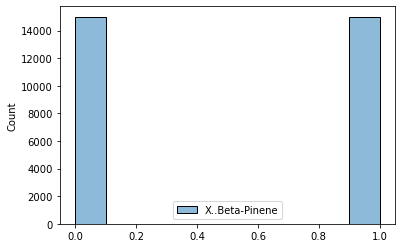

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.05344177861552028

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8959736807207941

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.8273750439489211

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([8.04844527e-05, 2.41582063e-04, 8.55461513e-04, 2.01809602e-05,
       9.27233430e-05, 8.59593816e-04, 1.34385112e-03, 2.95863685e-03,
       2.49760590e-08, 5.56669040e-04, 1.93455735e-04, 4.60577624e-04,
       9.76478926e-05, 1.17847946e-04, 1.29951137e-03, 3.96632502e-04,
       6.39549438e-04, 1.17114230e-03, 5.76427487e-05, 6.59942688e-05,
       1.69894846e-03, 6.22550694e-04, 8.65673774e-04, 6.65285835e-04,
       1.48556723e-03, 1.12978405e-04, 2.88477413e-04, 3.73354896e-04,
       3.45670940e-04, 8.06221940e-03, 1.11981445e-03, 8.78424360e-05,
       2.30123018e-03, 2.52072406e-04, 5.04384908e-04, 6.32598515e-04,
       7.13759906e-04, 1.20772912e-03, 1.61295647e-04, 4.26292573e-03,
       9.02428030e-04, 7.75703128e-04, 2.17339394e-04, 7.32902985e-04,
       6.80942858e-04, 1.20240636e-04, 1.33737087e-03, 1.78599663e-05,
       6.00985324e-04, 2.48500073e-04, 1.67388773e-04, 7.98762172e-04,
       1.99650917e-04, 7.33528949e-05, 6.47640240e-04, 1.44252712e-03,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_7,tfidf_29,tfidf_32,tfidf_39,tfidf_57,tfidf_84,tfidf_101,tfidf_119,tfidf_121,tfidf_125,...,tfidf_310,tfidf_312,tfidf_329,tfidf_333,tfidf_340,tfidf_347,indica,blueberry,grape,woody
0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.165248,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0
1,0.000000,0.0,0.184581,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.208564,0.000000,0.077150,0.0,0.0,0.0,0,0,0,0
2,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.104649,0.000000,0.0,0.0,0.0,0,0,0,0
3,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.117085,0.0,0.0,0.0,0,0,0,0
4,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.178640,0.0,...,0.000000,0.163848,0.120848,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.261458,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.179750,0.132576,0.0,0.0,0.0,1,0,0,0
29996,0.000000,0.0,0.000000,0.0,0.0,0.46193,0.0,0.288772,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0
29997,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0
29998,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_7',
 'tfidf_29',
 'tfidf_32',
 'tfidf_39',
 'tfidf_57',
 'tfidf_84',
 'tfidf_101',
 'tfidf_119',
 'tfidf_121',
 'tfidf_125',
 'tfidf_132',
 'tfidf_145',
 'tfidf_157',
 'tfidf_168',
 'tfidf_179',
 'tfidf_181',
 'tfidf_197',
 'tfidf_198',
 'tfidf_224',
 'tfidf_237',
 'tfidf_244',
 'tfidf_254',
 'tfidf_260',
 'tfidf_264',
 'tfidf_265',
 'tfidf_270',
 'tfidf_285',
 'tfidf_302',
 'tfidf_309',
 'tfidf_310',
 'tfidf_312',
 'tfidf_329',
 'tfidf_333',
 'tfidf_340',
 'tfidf_347',
 'indica',
 'blueberry',
 'grape',
 'woody']

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_bpine.pkl")
joblib.dump(selector, "selector_knn_tfidf_bpine.pkl")

['selector_knn_tfidf_bpine.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.04020128950447701

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.0327287304676206

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1809108356832741

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8985506160415431

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8671793776279542

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03285106273884254

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.02795606756554861

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1672006805176002

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9403896314369824

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.886547927766259

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_bpine.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_bpine.pkl")

['y_test_knreg_tfidf_bpine.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.034720215143407576

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.882325906801486

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.028988096316168555

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.1702589096528242

In [47]:
y_test

,X..Beta-Pinene
10747,0.006389
12573,0.007778
29676,0.003333
8856,0.012222
21098,1.000000
...,...
26329,1.000000
29693,0.003333
16605,1.000000
19704,1.000000


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

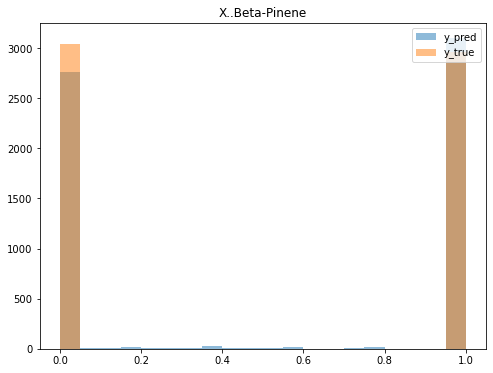

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Pinene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_bpine.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.943
P-value: 0.000


<AxesSubplot:>

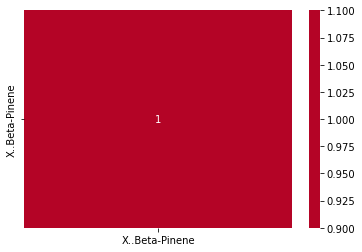

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)